# Image Masking

## Remove Crowd

Load Image:

In [60]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('bulls.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [61]:
court_color = np.uint8([[[160,221,248]]])
hsv_court_color = cv2.cvtColor(court_color, cv2.COLOR_BGR2HSV)
hue = hsv_court_color[0][0][0]

In [62]:
# define range of blue color in HSV
lower_color = np.array([hue - 10,10,10])
upper_color = np.array([hue + 10,255,255])

In [63]:
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv_img, lower_color, upper_color)

In [64]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

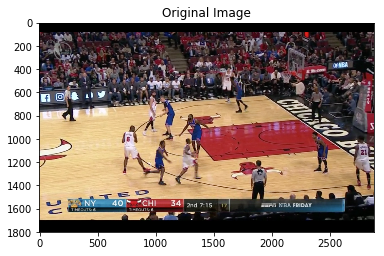

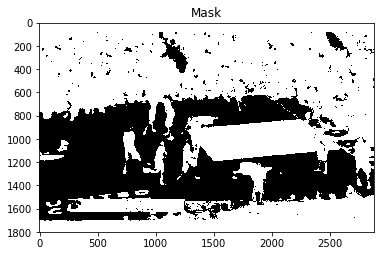

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [65]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.show()
plt.imshow(mask, cmap='Greys'), plt.title('Mask'), plt.savefig('mask.jpg'), plt.show()
print(mask)

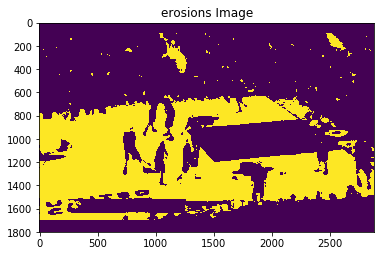

(<matplotlib.image.AxesImage at 0x118da1780>,
 Text(0.5,1,'erosions Image'),
 None)

In [66]:
# Erosion
kernel = np.ones((2,2),np.uint8)
erosions2 = cv2.erode(mask,kernel,iterations = 5)
plt.imshow(erosions2), plt.title('erosions Image'), plt.show()

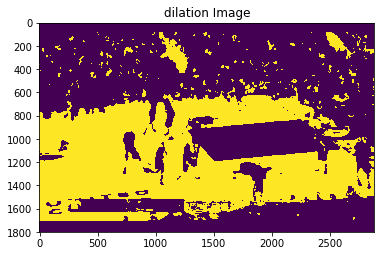

(<matplotlib.image.AxesImage at 0x12aa69160>,
 Text(0.5,1,'dilation Image'),
 None)

In [67]:
# Dilation
dilation = cv2.dilate(mask,kernel,iterations = 3)
plt.imshow(dilation), plt.title('dilation Image'), plt.show()

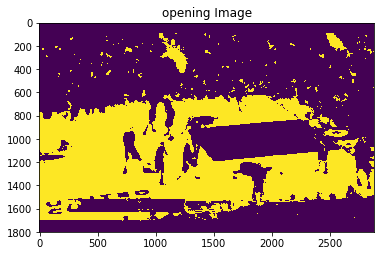

(<matplotlib.image.AxesImage at 0x1186cc5f8>,
 Text(0.5,1,'opening Image'),
 None)

In [68]:
# Opening
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening), plt.title('opening Image'), plt.show()

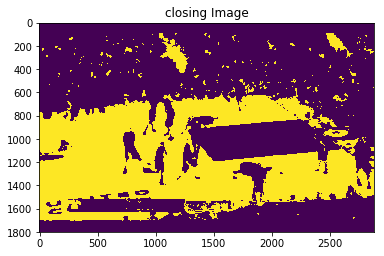

(<matplotlib.image.AxesImage at 0x12a7b2278>,
 Text(0.5,1,'closing Image'),
 None)

In [69]:
# Closing
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing), plt.title('closing Image'), plt.show()

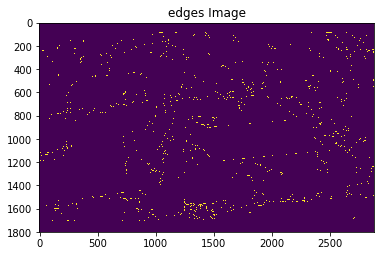

(<matplotlib.image.AxesImage at 0x11c6898d0>, Text(0.5,1,'edges Image'), None)

In [70]:
# use Canny edge detector to find edges in the image.  The thresholds determine how
# weak or strong an edge will be detected.  These can be tweaked.
lower_threshold = 50
upper_threshold = 150
edges = cv2.Canny(closing, lower_threshold, upper_threshold)
plt.imshow(edges), plt.title('edges Image'), plt.show()

In [71]:
# detect lines in the image.  This is where the real work is done.  Higher threshold
# means a line needs to be stronger to be detected, so again, this can be tweaked.
threshold = 200
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

In [72]:
# convert each line to coordinates back in the original image
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * -b)
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * -b)
        y2 = int(y0 - 1000 * a)

        # draw each line on the image
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

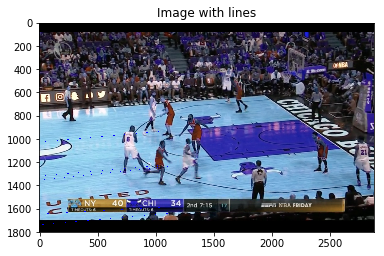

(<matplotlib.image.AxesImage at 0x118ff22b0>,
 Text(0.5,1,'Image with lines'),
 None)

In [73]:
# write the image to disk
plt.imshow(img), plt.title('Image with lines'), plt.show()